# Lección 2: Aprendizaje Supervisado

Autor: Jorge Castro, Fabricio Quirós Corella


---


Este notebook pretende abarcar el siguiente contenido (120 min):
- Modelos y tipos de clasificación. (55 min)
- Modelos y tipos de regresión. (50 min)
- Métricas de aprendizaje supervisado (15 min)

Algoritmos que requieren de ejemplos de entrenamiento para los cuales se conoce de antemano la salida correcta o el valor a predecir. Existen principalmente dos tipos de problemas: **clasificación** y **regresión**.

## Clasificación

Los modelos de **clasificación** buscan predecir una **etiqueta** de clase discreta a partir de variables de entrada discretas o continuas. Esto implica que en un problema de clasificación las entradas pueden ser continuas, discretas o categóricas, pero la variable de respuesta es categórica.

### Tipos de clasificación

Cuando aplicamos una clasificación usando dos o más entradas o variables, para predecir una salida categórica, hablamos de una **clasificación multivariada**.

Si contamos con solo 2 salidas o clases se dice que es un problema de **clasificación binaria**. Por ejemplo, si quisiéramos diagnosticar cáncer a partir de imágenes microscópicas de tejidos o si quisiéramos identificar el género de una persona a partir de una grabación de audio.

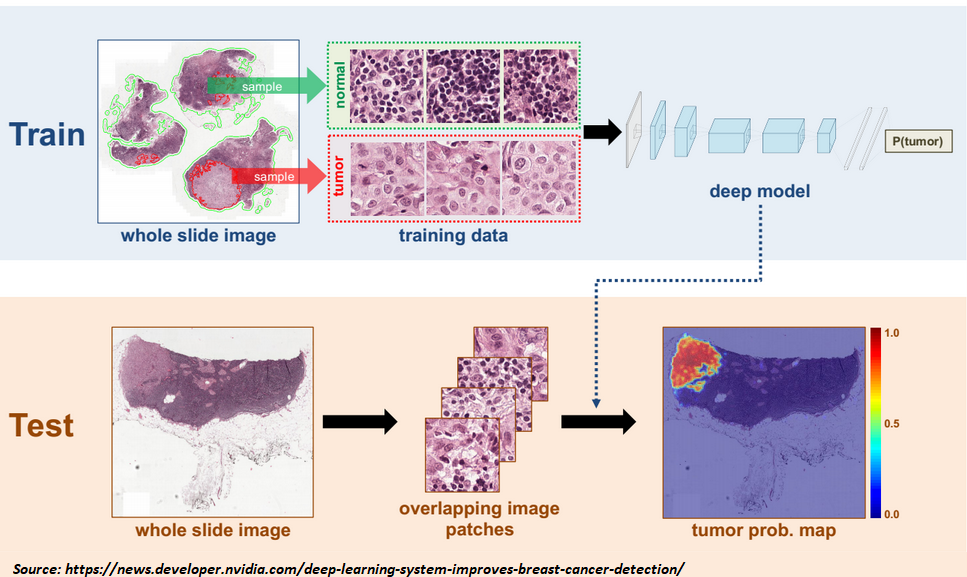

Si contamos con más de 2 clases se dice que es un problema de **clasificación multiclase**. Por ejemplo, si quisiéramos detectar diferentes especies de plantas usando fotos de sus hojas.

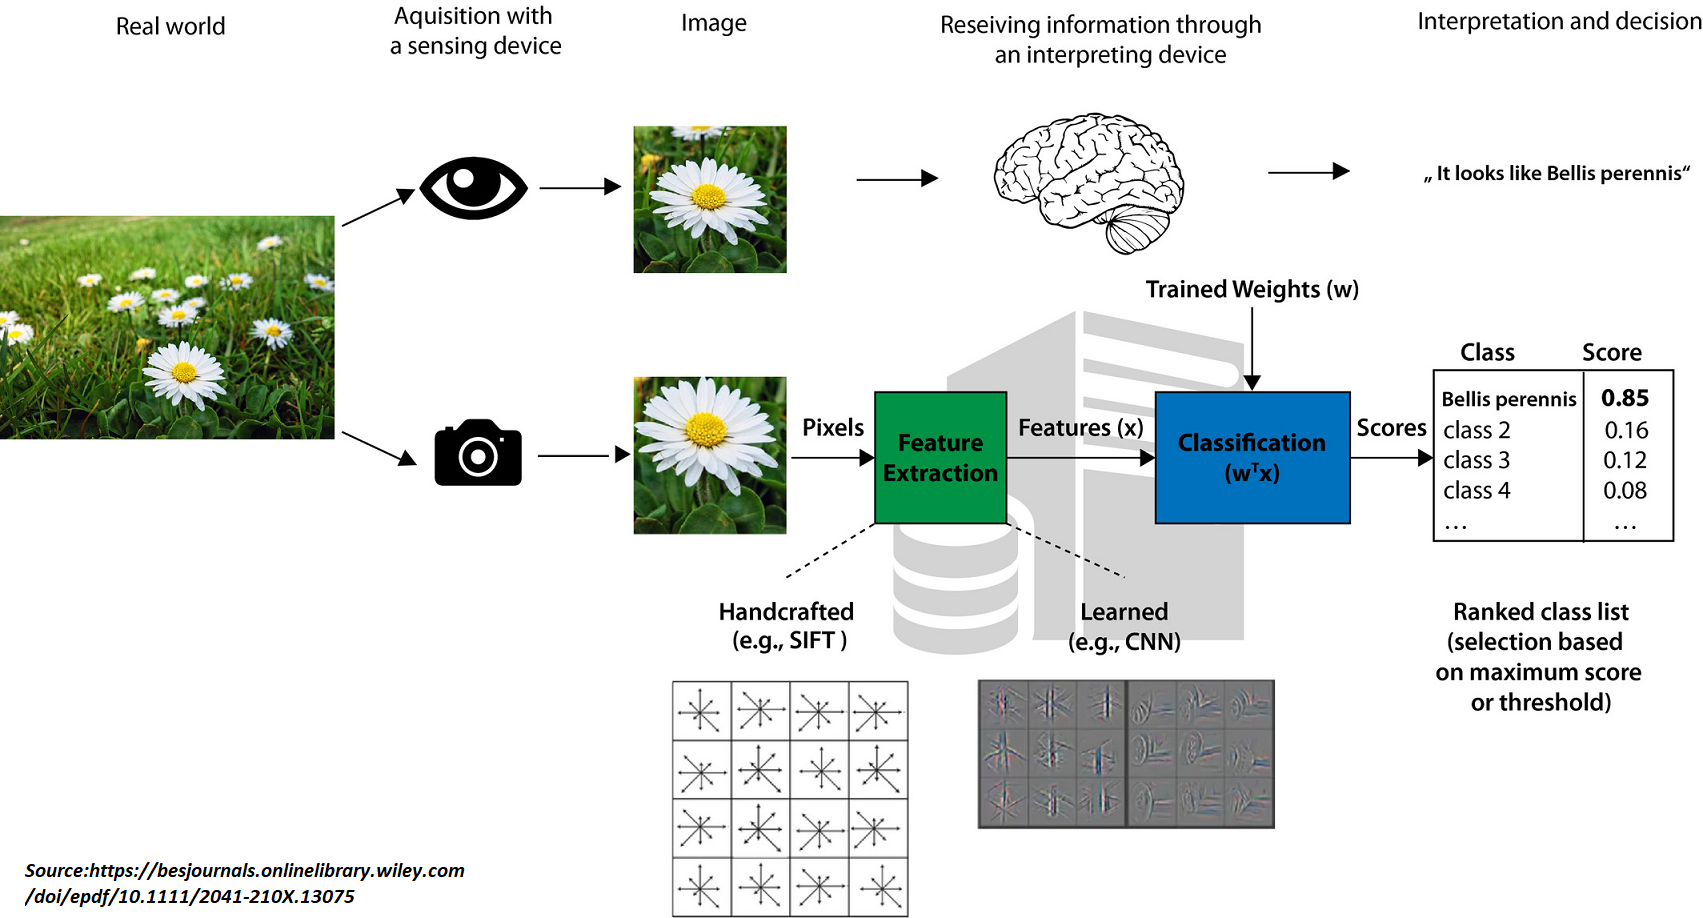

Cuando a cada muestra de entrenamiento se le pueden asignar 2 o más clases se dice que es un problema de **clasificación multi-etiqueta**. Por ejemplo, si quisiéramos detectar las diferentes especies de pájaros vocalizando en una grabación de audio.

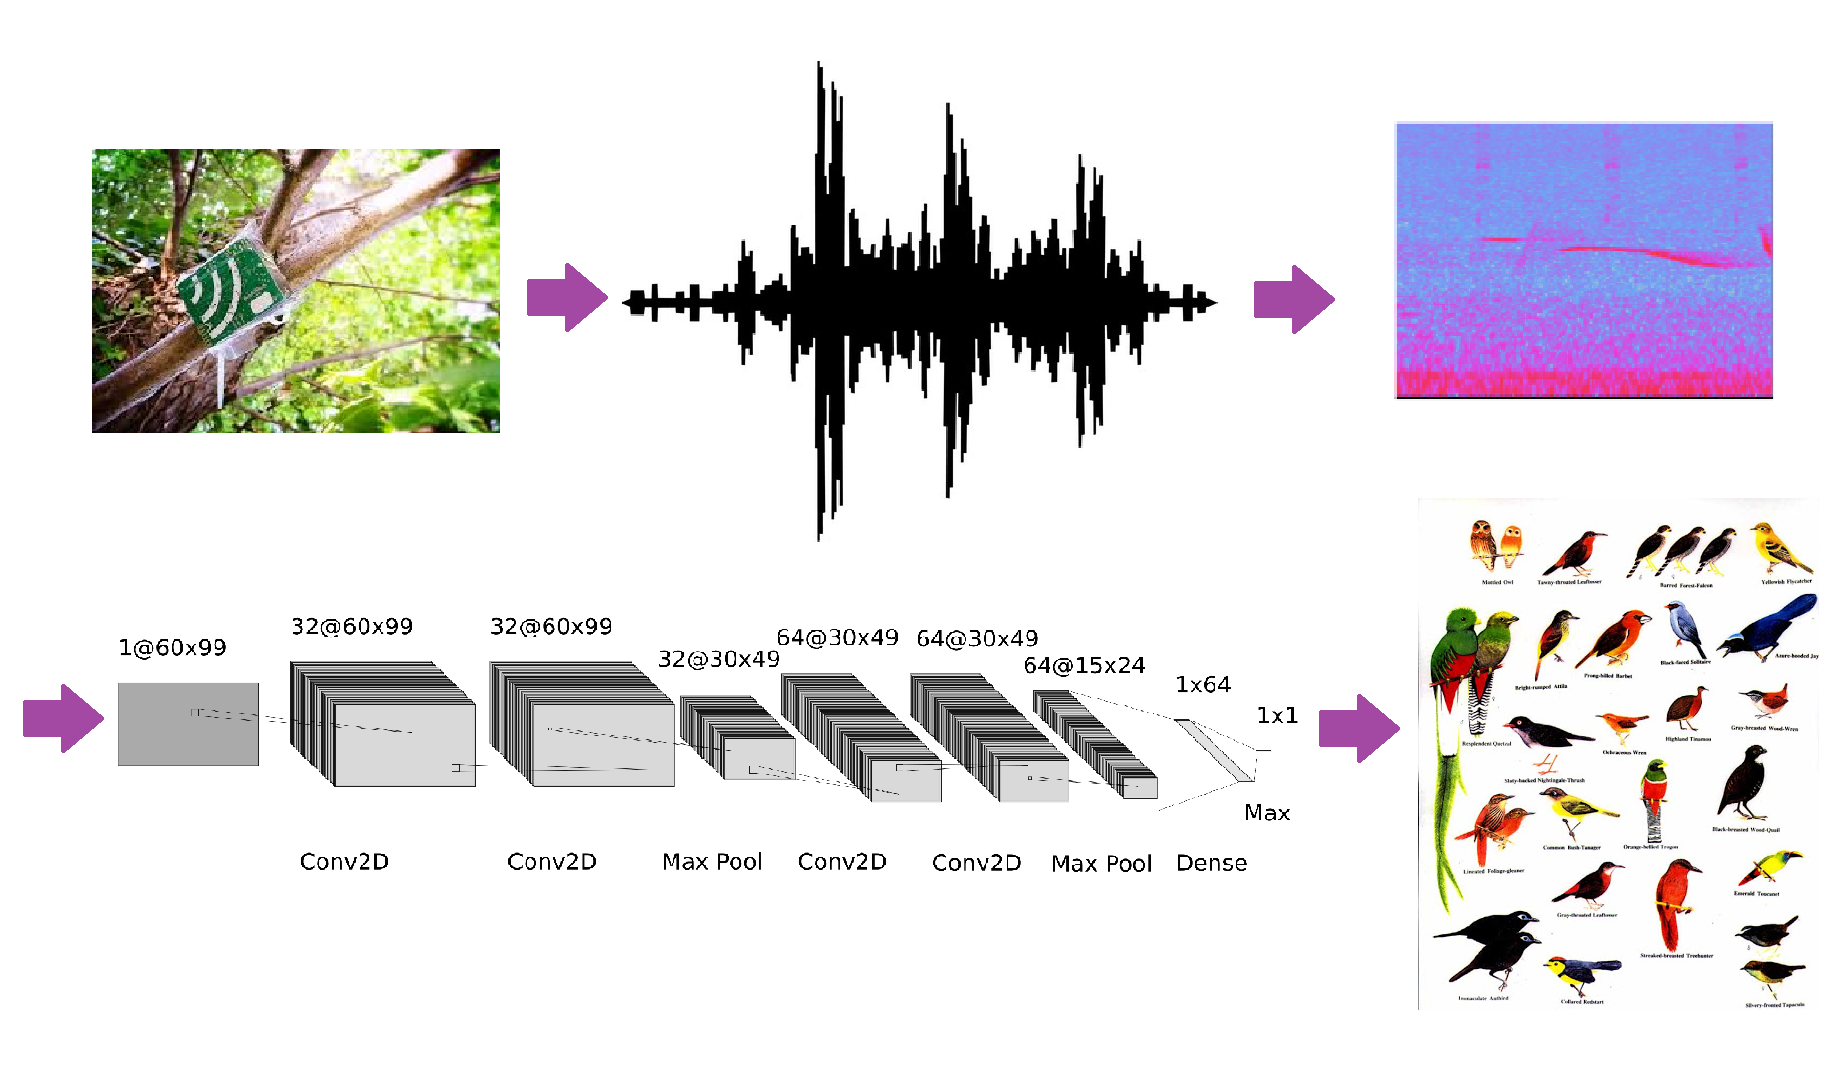

### Regresión logística binaria

La regresión logística binaria es uno de los modelos de clasificación más simples y ampliamente usados. A través de la regresión logística binaria se obtiene **un límite de decisión** (*decision boundary*) para separar dos clases. Por ejemplo, si quisiéramos obtener un modelo de clasificación entre manzanas y limones, esto de acuerdo a su anchura y altura:

**Nota:** Si estuviéramos trabajando en Colab y queremos montar nuestro repositorio de Drive, ejecutamos lo siguiente.

In [ ]:
#Código para montar el Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Importamos las librerías de interés y la que implemente el objeto del modelo de Regresión Logística.

In [1]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices
import matplotlib.pyplot as plt #biblioteca para visualización de datos
from sklearn.linear_model import LogisticRegression #biblioteca de machine learning

Cargamos el conjunto de datos en cuestión.

In [2]:
filepath = '/home/fquiros/Talleres/Python/MachineLearning/datasets/fruits.csv' # sustituir con su ruta de usuario
dataset = pd.read_csv(filepath, header=0)

Aplicamos un análisis exploratorio básico de los datos.

In [3]:
dataset.shape

(59, 7)

Revisemos las primeras observaciones de nuestro marco de datos.

In [4]:
#Explorar el set de datos como un dataframe
dataset.head(n=35)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


Generamos un nuevo dataframe que solo contiene las observaciones asociadas a manzanas y limones.

In [5]:
#Seleccionar solo manzanas y limones
apples = (dataset['fruit_name'] == 'apple')
lemons = (dataset['fruit_name'] == 'lemon')

dataset1 = dataset.loc[apples | lemons]
print(dataset1.shape)

(35, 7)


Revisaremos las últimas 10 observaciones del dataframe.

In [6]:
#Explorar el set de datos que contiene solo observacions de manzanas y limones
dataset1.tail(n=10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
49,4,lemon,unknown,132,5.8,8.7,0.73
50,4,lemon,unknown,130,6.0,8.2,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
52,4,lemon,unknown,118,5.9,8.0,0.72
53,4,lemon,unknown,120,6.0,8.4,0.74
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


Desplegamos el gráfico de dispersión para el análisis bivariado relativo a la altura y al ancho de las manzanas y limones.

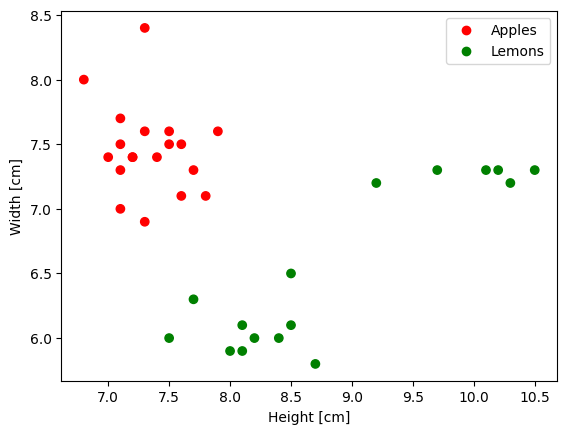

In [7]:
#Extracción de atributos y etiquetas
x = dataset1[['height','width']].values
y = dataset1[['fruit_name']].values

#Visualización de los datos
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}
plt.scatter(dataset1['height'],
            dataset1['width'],
            c=dataset1['fruit_name'].map(colors),
            label=dataset1['fruit_name'].map(colors))

#Ejes y leyendas
plt.xlabel('Height [cm]')
plt.ylabel('Width [cm]')
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green']]
plt.legend(handlelist,['Apples','Lemons'])
plt.show()

La regresión logística busca la ecuación de la línea que mejor separe las clases (manzanas y limones):

In [8]:
logRegBin = LogisticRegression()
logRegBin = logRegBin.fit(x, np.ravel(y))

Grafiquemos el modelo de regresión logística para dos frutas:

Text(0, 0.5, 'Width [cm]')

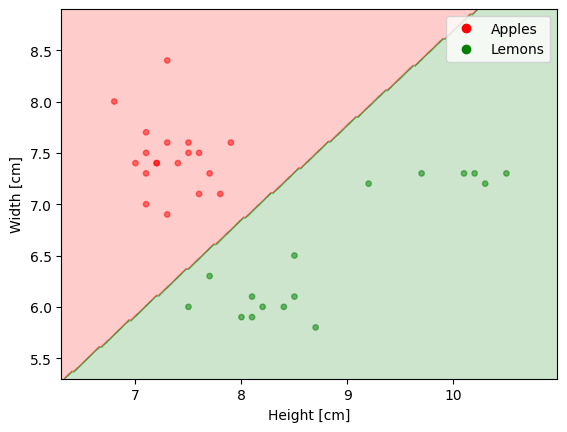

In [9]:
# imports
from matplotlib.colors import ListedColormap, BoundaryNorm

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# generate logistic regression curve
Z = logRegBin.predict(np.c_[xx.ravel(), yy.ravel()])
zints = pd.factorize(Z)
colorOrder = np.vectorize(colors.get)(zints[1])
zints = zints[0].reshape(xx.shape)

# scatter plot and logistic regression plot
cmap_fruits = ListedColormap(colorOrder)
plt.contourf(xx, yy, zints, cmap=cmap_fruits,alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=dataset1['fruit_name'].map(colors),s=15, alpha=0.5)
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green']]
plt.legend(handlelist,['Apples','Lemons'])
plt.xlabel('Height [cm]')
plt.ylabel('Width [cm]')

Por ejemplo, si tuviésemos una observación nueva con 9 cm de altura y 7 cm de ancho, ¿cómo debería clasificarse?

In [10]:
new_sample1 = [[9,7]] #(height, width)
print(logRegBin.predict(new_sample1))

['lemon']


De igual forma, si tuviésemos una nueva fruta con 7 cm de altura y 8 cm de ancho:

In [11]:
new_sample2 = [[7,8]] #(height, width)
print(logRegBin.predict(new_sample2))

['apple']


No obstante, como este segundo punto está más alejado del límite de decisión deberíamos ver que la probabilidad de pertenencia a su respectiva clase (clase 0 o clase negativa: clase manzana) es más alta que la del primer punto con respecto a su clase (clase 1 o clase positiva: clase limón).

In [12]:
print(logRegBin.classes_) #Observar orden de asignación de clases
print('Probabilidad de pertenencia del primer punto a clase manzana y limón:', logRegBin.predict_proba(new_sample1))
print('Probabilidad de pertenencia del segundo punto a clase manzana y limón:', logRegBin.predict_proba(new_sample2))

['apple' 'lemon']
Probabilidad de pertenencia del primer punto a clase manzana y limón: [[0.18437825 0.81562175]]
Probabilidad de pertenencia del segundo punto a clase manzana y limón: [[0.98270364 0.01729636]]


Para medir el desempeño de un algoritmo de clasificación empleamos la **exactitud** (*accuracy*) que nos brinda el porcentaje de observaciones que fueron correctamente clasificadas.

In [13]:
print('Exactitud del modelo de regresión logística binaria:', logRegBin.score(x, y))

Exactitud del modelo de regresión logística binaria: 1.0


### Regresión logística multiclase

La regresión logística para más de dos clases se obtienen múltiples límites de decisión para separar las diferentes clases. Un enfoque común para realizar esta tarea se conoce como **regresión logística de uno contra el resto** (*one-vs-all*) y consiste en aplicar una regresión logistica binaria a cada clase con respecto al resto de clases.

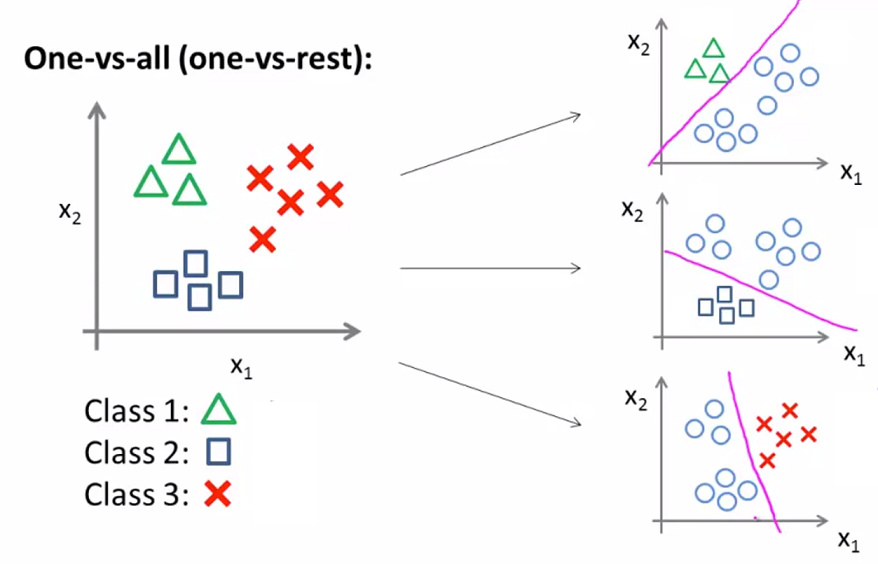

Suponiendo que quisiéramos clasificar múltiples frutas en vez de dos (clasificación multiclase); por ejemplo, manzanas, limones, mandarinas y naranjas:

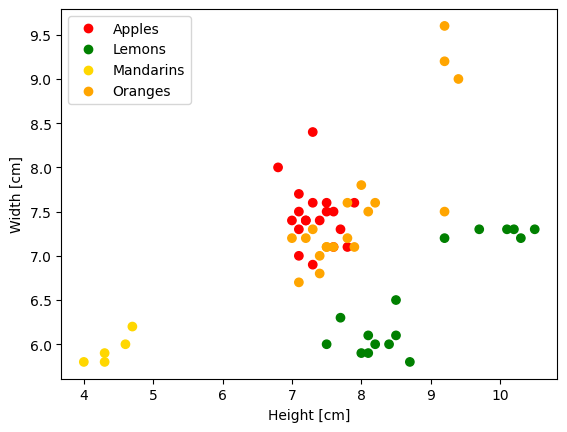

In [14]:
#Extracción de atributos y etiquetas
x2 = dataset[['height','width']].values # 2 descriptores
y4 = dataset[['fruit_name']].values # 4 clases

#Visualización de los datos
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}
plt.scatter(dataset['height'],
            dataset['width'],
            c=dataset['fruit_name'].map(colors),
            label=dataset['fruit_name'].map(colors))

#Ejes y leyendas
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples', 'Lemons', 'Mandarins', 'Oranges'])
plt.xlabel('Height [cm]')
plt.ylabel('Width [cm]')
plt.show()

En la función `LogisticRegression()` podemos escoger el enfoque de uno contra el resto, para hacer clasificación multiclase estableciendo el parámetro `multi_class='ovr'`.

In [15]:
logRegOvr = LogisticRegression(multi_class='ovr')
logRegOvr = logRegOvr.fit(x2, np.ravel(y4))

/opt/python/mamba3/envs/python-ml-dl-kernel/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Grafiquemos el modelo de regresión logística multiclase de uno contra el resto:

Text(0, 0.5, 'Width [cm]')

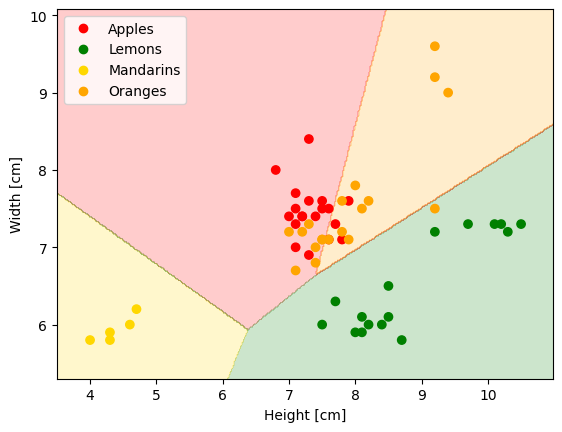

In [16]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x2[:, 0].min() - 0.5, x2[:, 0].max() + 0.5
y_min, y_max = x2[:, 1].min() - 0.5, x2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# generate multiclass (one-vs-rest) logistic regression curve
Z = logRegOvr.predict(np.c_[xx.ravel(), yy.ravel()])
zints = pd.factorize(Z)
colorOrder = np.vectorize(colors.get)(zints[1])
zints = zints[0].reshape(xx.shape)

# scatter plot and multiclass logistic regression plot
cmap_fruits = ListedColormap(colorOrder)
plt.contourf(xx, yy, zints, cmap=cmap_fruits,alpha=0.2)
plt.scatter(x2[:, 0], x2[:, 1], c=dataset['fruit_name'].map(colors))
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples', 'Lemons', 'Mandarins', 'Oranges'])
plt.xlabel('Height [cm]')
plt.ylabel('Width [cm]')

También podemos seleccionar otro enfoque más avanzado llamado **regresión multinomial** estableciendo `multi_class='multinomial'`.

In [17]:
logRegMultinom = LogisticRegression(multi_class='multinomial', max_iter=1000)
logRegMultinom = logRegMultinom.fit(x2, np.ravel(y4))

/opt/python/mamba3/envs/python-ml-dl-kernel/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Grafiquemos el modelo de regresión multinomial:

Text(0, 0.5, 'Width [cm]')

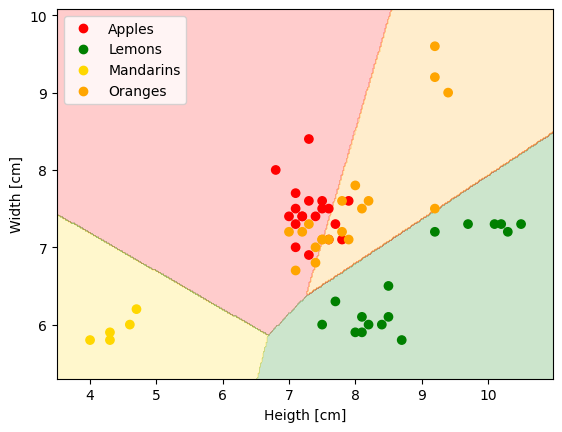

In [18]:
# generate multiclass (one-vs-rest) logistic regression curve
Z = logRegMultinom.predict(np.c_[xx.ravel(), yy.ravel()])
zints = pd.factorize(Z)
colorOrder = np.vectorize(colors.get)(zints[1])
zints = zints[0].reshape(xx.shape)

# scatter plot and multiclass logistic regression plot
cmap_fruits = ListedColormap(colorOrder)
plt.contourf(xx, yy, zints, cmap=cmap_fruits,alpha=0.2)
plt.scatter(x2[:, 0], x2[:, 1], c=dataset['fruit_name'].map(colors))
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples', 'Lemons', 'Mandarins', 'Oranges'])
plt.xlabel('Heigth [cm]')
plt.ylabel('Width [cm]')

Calculamos la exactitud de la clasificación para ambos modelos de regresión logística multiclase:

In [19]:
print('Exactitud del modelo de regresión logística usando uno contra el resto:', logRegOvr.score(x2, y4))
print('Exactitud del modelo de regresión logística usando la opción multinomial:', logRegMultinom.score(x2, y4))

Exactitud del modelo de regresión logística usando uno contra el resto: 0.7796610169491526
Exactitud del modelo de regresión logística usando la opción multinomial: 0.7966101694915254


### Regresión logística multivariada

Ahora, como vimos anteriormente, si queremos mejorar el desempeño en la clasificación multiclase, podemos aumentar la cantidad de descriptores de entrada. Por ejemplo, podríamos usar la información de la masa de las frutas para clasificarlas entre múltiples clases.

In [20]:
#Extracción de atributos y etiquetas
x3 = dataset[['height','width','mass']].values

Ejecución del ajuste del modelo de regresión multinomial usando el set de datos con tres predictores y su puntaje de clasificación:

In [21]:
logRegMultiVar = LogisticRegression(multi_class='multinomial')
logRegMultiVar = logRegMultiVar.fit(x3, np.ravel(y4))
print('Exactitud del modelo de regresión multinomial usando 3 predictores:', logRegMultiVar.score(x3, y4))

Exactitud del modelo de regresión multinomial usando 3 predictores: 0.8305084745762712


/opt/python/mamba3/envs/python-ml-dl-kernel/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/python/mamba3/envs/python-ml-dl-kernel/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regresión logística polinomial

Por otro lado, podemos aumentar la complejidad del modelo de regresión logística multiclase, con el propósito de aumentar su desempeño en la clasificación. Esto se puede hacer mediante una transformación polinomial de los descriptores de entrada. De esta manera, los límites de decisión a obtener pueden ser más flexibles que simples líneas.

In [22]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
degree = 4
x_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x2)
#print(x_pol) #nueva entrada

logRegPol = LogisticRegression(max_iter=1000) #max_iter=100
logRegPol = logRegPol.fit(x_pol, np.ravel(y4))

/opt/python/mamba3/envs/python-ml-dl-kernel/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Despleguemos el gráfico de dispersión para el modelo de regresión logística polinomial:

Text(0, 0.5, 'Width [cm]')

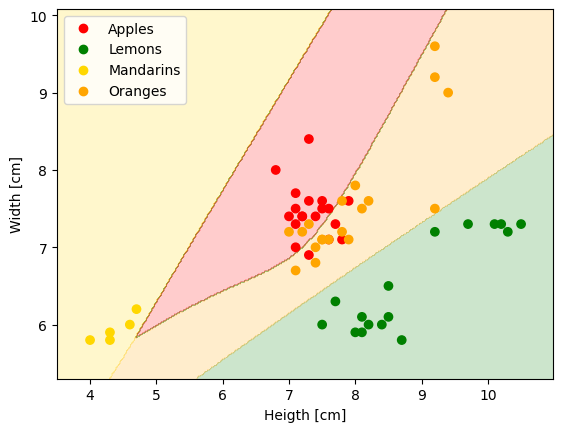

In [23]:
#transform grid to polinomial feature space to make predictions
gridPol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(np.array([xx.ravel(), yy.ravel()]).T)
Z = logRegPol.predict(gridPol)
zints = pd.factorize(Z)
colorOrder = np.vectorize(colors.get)(zints[1])
zints = zints[0].reshape(xx.shape)

# scatter plot and polinomial logistic regression plot
cmap_fruits = ListedColormap(colorOrder)
plt.contourf(xx, yy, zints, cmap=cmap_fruits,alpha=0.2)
plt.scatter(x2[:, 0], x2[:, 1], c=dataset['fruit_name'].map(colors))
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples','Lemons','Mandarins','Oranges'])
plt.xlabel('Heigth [cm]')
plt.ylabel('Width [cm]')

Obtenemos la exactitud de clasificación del modelo de regresión logística polinomial usando 2 predictores.

In [24]:
print('Exactitud del modelo de regresión logística polinomial de grado %d:' % degree, logRegPol.score(x_pol, y4))

Exactitud del modelo de regresión logística polinomial de grado 4: 0.864406779661017


### Matriz de confusión

La matriz de confusión $M$ es una **métrica de evaluación** que brinda información más detallada sobre el desempeño del clasificador, especialmente multiclase, que permite entender con mayor detalle los errores y los tipos de errores que se están cometiendo para cada clase ${c}_i$ perteneciente al vector de clases $\vec{c}$.

In [25]:
#Obtención de la matriz de confusión usando el paquete metrics de la biblioteca sklearn
from sklearn.metrics import confusion_matrix

#Impresión básica en pantalla
predOvr = logRegOvr.predict(x2)
cm = confusion_matrix(y4, predOvr)
print(cm)

[[15  0  0  4]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 8  1  0 10]]


$M$ presenta $|\vec{c}|$ filas y $|\vec{c}|$ columnas, donde $|\vec{c}|$ es la cantidad de clases. La entrada $M_{i,j}$ indica la cantidad de observaciones de la clase ${c}_i$ que fueron clasificadas como clase ${c}_j$. De esta forma, si $i=j$, $M_{i,j}$ indica la cantidad de **verdaderos positivos** obtenidos para la clase $i$. Asimismo, si $i \neq j$, $M_{i,j}$ indica la cantidad de observaciones de la clase $i$ que fueron erróneamente clasificadas como clase $j$.

In [26]:
#Impresión OVR con nombres de filas y columnas
dfcm = pd.DataFrame(cm)
dfcm.columns = logRegOvr.classes_
dfcm.index = logRegOvr.classes_
print(dfcm)

          apple  lemon  mandarin  orange
apple        15      0         0       4
lemon         0     16         0       0
mandarin      0      0         5       0
orange        8      1         0      10


Por lo tanto, si sumamos todas las entradas $M_{i,j}$ de la fila $i$ en donde $i \neq j$ obtenemos el total de **falsos positivos** para la clase ${c}_i$ y si sumamos todas las entradas $M_{i,j}$ de la columna $j$ en donde $i \neq j$ obtenemos el total de **falsos negativos** para la clase ${c}_j$.

In [27]:
#Impresión Multinomial con nombres de filas y columnas
predMultinom = logRegMultinom.predict(x2)
cm1 = confusion_matrix(y4, predMultinom)
dfcm1 = pd.DataFrame(cm1)
dfcm1.columns = logRegMultinom.classes_
dfcm1.index = logRegMultinom.classes_
print(dfcm1)

          apple  lemon  mandarin  orange
apple        15      0         0       4
lemon         0     16         0       0
mandarin      0      0         5       0
orange        8      0         0      11


Los **verdaderos negativos** para cualquier clase ${c}_k$ se pueden obtener sumando todas las entradas de la matriz $M_{i,j}$ tal que $i \neq k$ y $j \neq k$. En síntesis, las filas de una matriz de confusión hacen referencia a las verdaderas clases de cada observación y las columnas a las predicciones hechas por el clasificador.

In [28]:
#Impresión Multinomial-Multivariada con nombres de filas y columnas
predMultiVar = logRegMultiVar.predict(x3)
cm2 = confusion_matrix(y4, predMultiVar)
dfcm2 = pd.DataFrame(cm2)
dfcm2.columns = logRegMultiVar.classes_
dfcm2.index = logRegMultiVar.classes_
print(dfcm2)

          apple  lemon  mandarin  orange
apple        16      0         0       3
lemon         0     16         0       0
mandarin      0      0         5       0
orange        7      0         0      12


In [29]:
#Impresión Regresión Logística Polinomial con nombres de filas y columnas
predPol = logRegPol.predict(x_pol)
cm3 = confusion_matrix(y4, predPol)
dfcm3 = pd.DataFrame(cm3)
dfcm3.columns = logRegPol.classes_
dfcm3.index = logRegPol.classes_
print(dfcm3)

          apple  lemon  mandarin  orange
apple        14      0         0       5
lemon         0     16         0       0
mandarin      0      0         5       0
orange        3      0         0      16


Existen otros modelos de clasificación más complejos como:

1. Algoritmo del k-ésimo vecino más cercano (NN).
2. Máquinas de soporte vectorial (SVM).
3. Árboles de decisión.
4. Bosques aleatorios (Random Forest).
5. Redes Neuronales profundas (DNN).

### Clasificación de los vecinos más cercanos

El método busca el/los punto(s) más cercanos; es decir, el/los vecino(s) más cercano(s) a la hora de clasificar un nuevo dato.

Se considera como caso elemental el cálculo a partir de 1 vecino cercano. Si es más de 1 vecino, se utiliza **la regla del voto**, que es un conteo de la cantidad de vecinos cercanos pertenecientes a una clase, o relativos a un valor dada una predicción.

En **clasificación binaria**, es posible emplear igualmente un algoritmo del k-ésimo vecino más cercano, así:

In [30]:
#kNN para clasificación binaria
from sklearn.neighbors import KNeighborsClassifier

#Clasificador del vecino más cercano
n_neighbors = 1
neighBin = KNeighborsClassifier(n_neighbors=n_neighbors)

#Ajustar el modelo al set de entrenamiento y a sus etiquetas
neighBin = neighBin.fit(x, np.ravel(y))
print('Exactitud del clasificador binario del vecino más cercano: ', neighBin.score(x, y))

Exactitud del clasificador binario del vecino más cercano:  1.0


Ejecutemos las predicciones de clasificación binaria con las muestras anteriores:

In [31]:
#Probamos el clasificador binario para dos observaciones nuevas
print(neighBin.predict(new_sample1))
print(neighBin.predict(new_sample2))

['lemon']
['apple']


Despleguemos la probalididad de que una observación pertenezca a una categoría:

In [32]:
print(neighBin.classes_) #Observar orden de asignación de clases
print('Probabilidad de pertenencia del primer punto a clase manzana o limón:', neighBin.predict_proba(new_sample1))
print('Probabilidad de pertenencia del segundo punto a clase manzana o limón:', neighBin.predict_proba(new_sample2))

['apple' 'lemon']
Probabilidad de pertenencia del primer punto a clase manzana o limón: [[0. 1.]]
Probabilidad de pertenencia del segundo punto a clase manzana o limón: [[1. 0.]]


De la misma manera, procedemos con el caso del **clasificador multi-clase** utilizando el método de kNNs con dos descriptores:

In [33]:
#Clasificador multiclase del k-ésimo vecino más cercano
n_neighbors = 4 # asociado al número de clases, ¿k-ajustado?
neighMultiClass = KNeighborsClassifier(n_neighbors=n_neighbors)
neighMultiClass = neighMultiClass.fit(x2, np.ravel(y4))
#Puntaje de exactitud del modelo kNN
print('Exactitud del clasificador multiclase del vecino más cercano: ', neighMultiClass.score(x2, y4))

Exactitud del clasificador multiclase del vecino más cercano:  0.8305084745762712


Revisemos la probabilidad de pertenencia de las nuevas observaciones utilizando el clasificador multi-clase empleando el método de kNNs:

In [34]:
print(neighMultiClass.classes_) # obsérvese la asignación de clases
print('Probabilidad de pertenencia del primer punto a las clases:', neighMultiClass.predict_proba(new_sample1))
print('Probabilidad de pertenencia del segundo punto a las clases:', neighMultiClass.predict_proba(new_sample2))

['apple' 'lemon' 'mandarin' 'orange']
Probabilidad de pertenencia del primer punto a las clases: [[0.   0.75 0.   0.25]]
Probabilidad de pertenencia del segundo punto a las clases: [[1. 0. 0. 0.]]


Calculamos la matriz de confusión para el clasificador multiclase:

In [35]:
predNN = neighMultiClass.predict(x2)
cm = confusion_matrix(y4, predNN)
dfcm = pd.DataFrame(cm)
dfcm.columns = neighMultiClass.classes_
dfcm.index = neighMultiClass.classes_
print(dfcm)

          apple  lemon  mandarin  orange
apple        17      0         0       2
lemon         0     16         0       0
mandarin      0      0         5       0
orange        7      1         0      11


El diseño de un clasificador de esta naturaleza implica encontrar una cantidad de vecinos donde el conjunto de pruebas entregue el mejor puntaje de precisión con nuevos datos de la mano de una precisión del conjunto de entrenamiento buena:

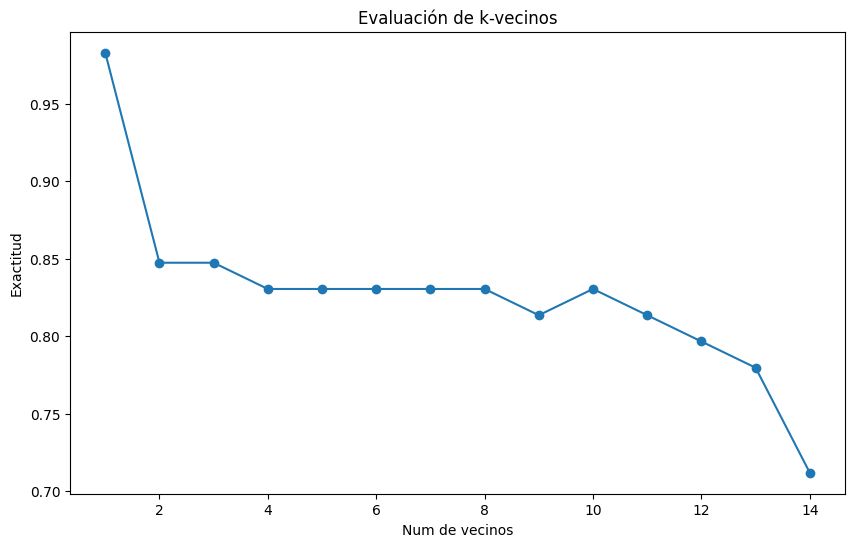

In [36]:
#entrenamiento de kNN
accs = []

#Calcular la precisión del modelo usando entre 1 y 15 vecinos
for k in range(1,15):
  neighMulti = KNeighborsClassifier(n_neighbors=k).fit(x2, np.ravel(y4))

  #para cada valor de vecinos se calcula la suma del cuadrado dentro del clúster
  acc = neighMulti.score(x2, y4)
  accs.append(acc)

#trazamos la curva de precision vs la cantidad de vecinos
plt.figure(figsize=[10,6])
plt.title('Evaluación de k-vecinos')
plt.xlabel('Num de vecinos')
plt.ylabel('Exactitud')
plt.plot(list(range(1,15)), accs, marker="o")
plt.show()

Un $k$ bajo representa un modelo de alta complejidad, y un $k$ alto, modelo de baja complejidad, donde se requiere ajustes de dicho valor y de la forma de medir la distancia entre la predicción y los vecinos más cercanos (euclidiana). Los modelos de clasificación pueden sufrir del problema de **sobreajuste** cuando se aumenta mucho la complejidad de los mismos.

**Ventajas:**
*   Fácil de entender.
*   Generalmente, entrega buenos resultados sin excesivo ajuste.

**Desventajas:**
*   Se puede volver lento si el conjunto de entrenamiento es muy grande.
*   No brinda buenos resultados cuando la dimensionalidad de los atributos es alta o cuando estos sean cero.

Por ejemplo, pensemos en un **clasificador multi-variado** y **multi-clase** basado en un método del vecino más cercano:

In [37]:
#Clasificador multiclase-multivariado del k-ésimo vecino más cercano
n_neighbors = 4 #k-ajustado
neighMultiVar = KNeighborsClassifier(n_neighbors=n_neighbors)
neighMultiVar = neighMultiVar.fit(x3, np.ravel(y4))
#Puntaje de exactitud del modelo kNN
print('Exactitud del clasificador multiclase-multivariado del vecino más cercano: ', neighMultiVar.score(x3, y4))

Exactitud del clasificador multiclase-multivariado del vecino más cercano:  0.7966101694915254


### Clasificación de soporte vectorial

En lugar una límite de decisión como en regresión logística ordinaria, se considera un **margen de decisión** correspondiente a la separación existente entre los datos de dos o más clases. El parámetro $C$ se emplear para controlar el ajuste del modelo al conjunto de datos, proceso conocido como **regularización**.

In [38]:
#Clasificador de soporte vectorial
from sklearn import svm

#Crear el clasificador binario de vector de soporte
svcBin = svm.SVC(degree=2, C=11)
svcBin = svcBin.fit(x, np.ravel(y))

#Crear el clasificador multiclase de vector de soporte
svcMulti = svm.SVC(degree=4, C=11) #grado de la función polinomial para los límites de decisión
svcMulti = svcMulti.fit(x2, np.ravel(y4))

#Determinar el puntaje de accuracy (exactitud)
accBin = svcBin.score(x, y)
accMulti = svcMulti.score(x2, y4)
print('Exactitud del clasificador binario de soporte vectorial:', accBin)
print('Exactitud del clasificador multiclase de soporte vectorial:', accMulti)

Exactitud del clasificador binario de soporte vectorial: 1.0
Exactitud del clasificador multiclase de soporte vectorial: 0.8305084745762712


Es decir, un valor alto de $C$ implica menos regularización, por lo que el modelo trata de ajustarse lo mejor posible a los datos de entrenamiento.

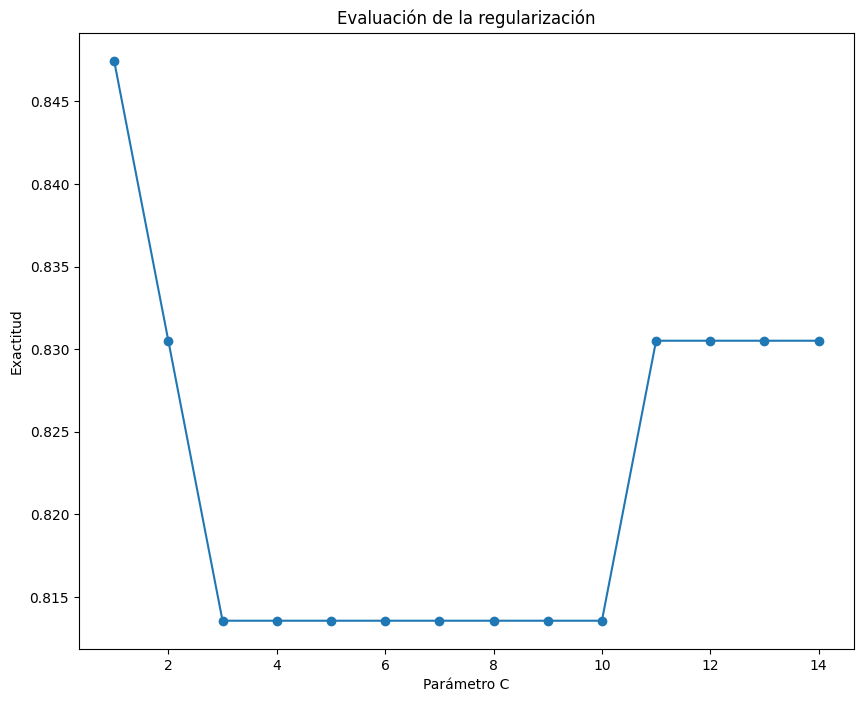

In [39]:
#entrenamiento de SVC
accs = []

#Calcular la precisión del modelo usando un grado de 4 entre 1 y 15
for C in range(1,15):
  svc = svm.SVC(degree=4, C=C).fit(x2, np.ravel(y4))
  #para cada valor de vecinos se calcula la suma del cuadrado dentro del clúster
  acc = svc.score(x2, y4)
  accs.append(acc)

#trazamos la curva de precision vs la cantidad de vecinos
plt.figure(figsize=[10,8])
plt.title('Evaluación de la regularización')
plt.xlabel('Parámetro C')
plt.ylabel('Exactitud')
plt.plot(list(range(1,15)), accs, marker='o')
plt.show()

**Ventajas:**

*   Buena precisión.
*   Opera bien con datos pequeños/limpios.

**Desventajas:**

*   Puede resultar lento con set de datos grandes.
*   No brinda buenos resultados con datos ruidosos.

### Consideraciones sobre los modelos de clasificación

1. Es importante destacar que en un problema de clasificación las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es **categórica**.
2. Dependiendo de la cantidad de categorías (clases) un problema de clasificación se puede considerar binario (2 clases) o multiclase (más de 2 clases). Si varias clases pueden ocurrir simultáneamente para una misma observación se dice que es un problema de clasificación multi-etiqueta.
3. Los coeficientes de la regresión logística se pueden obtener a través del algoritmo de optimización de **gradientes descendientes** u otras técnicas de optimización más avanzadas como **gradientes conjugados**, **BFGS** y **L-BFGS**.
4. Para medir el desempeño de un algoritmo de clasificación podemos usar la **exactitud** que nos brinda el porcentaje de observaciones que fueron correctamente clasificadas. Para obtener información más detallada sobre el desempeño del clasificador (especialmente cuando se tienen múltiples clases) se puede obtener la **matriz de confusión** que indica en cuáles clases se cometieron los errores y que tipos de errores fueron (falsos negativos o falsos positivos).
5. El parámetro $C$ del máquina de soporte vectorial consiste en un método de regularización que permite mejorar el **ajuste** del modelo o la función a la distribución del conjunto de datos de entrenamieno.

## Regresión

El objetivo es predecir o estimar un número continuo en un valor o un rango de valores establecido, tomando en cuenta entradas que puede ser continuas, discretas o categóricas. Se diferencia de la clasificación en el sentido de que la variable de respuesta es **continua**.

A continuación, se ejemplifica un modelo de regresión, con el objeto de estimar el valor de los vehículos a partir de datos históricos sobre los precios de otros vehículos previamente vendidos (en dólares) según el tamaño de su motor (en pulgadas cúbicas).

In [40]:
filepath = '/home/fquiros/Talleres/Python/MachineLearning/datasets/car_dataset.csv' # sustituir con su ruta de usuario'
dataset2 = pd.read_csv(filepath, header=0)

Se procede a realizar una exploración preliminar del objeto asociado al dataset de vehículos:

In [41]:
dataset2.shape #Dimensiones del dataset

(193, 25)

In [42]:
dataset2.head() #Imprimir primeras cinco filas del dataset

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Desplegamos un diagrama de dispersión que relaciona el tamaño del motor con el precio del vehículo:

<Axes: xlabel='engine-size', ylabel='price'>

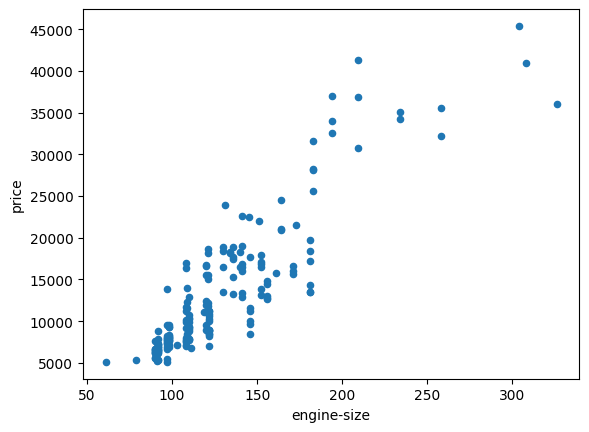

In [43]:
#Tamaño del motor en pulgadas cúbicas versus precio del auto en dólares
dataset2.plot.scatter('engine-size','price')

### Regresión lineal ordinaria

**Problema:** de acuerdo con la distribución de datos, queremos poner a la venta un vehículo cuyo motor pesa 220 pulgadas cúbicas, ¿Cuál debería ser su precio?

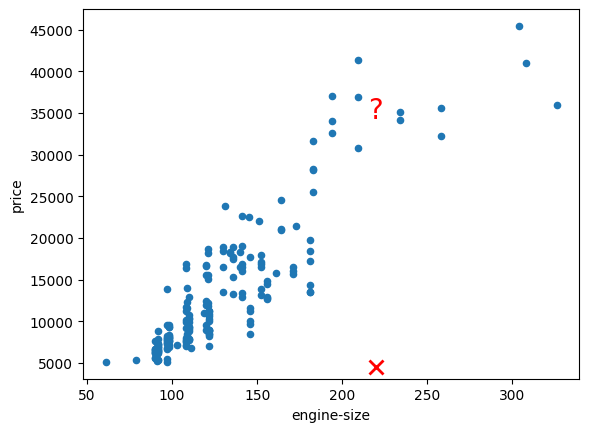

In [44]:
#Tamaño del motor en pulgadas cúbicas versus precio del auto en dólares
dataset2.plot.scatter('engine-size','price')

#Graficar punto de interés de predicción para ejemplo de regresión lineal
l,u = plt.ylim()
plt.plot(220,l+1400,color='red',markersize=10,marker='x',mew=2)
plt.ylim(bottom=l)
plt.text(220-5,u-13000,'?',color='red',fontsize=20)
plt.show()

Para ello, podemos utilizar un modelo de **regresión lineal ordinaria (OLR)**, donde se hace uso de la **función lineal** en los atributos de entrada y los valores a predecir. La idea consiste en encontrar los coeficientes de la regresión lineal que minicen la suma de residuales cuadrados (SSR) o el error cuadrático medio (MSE), a través del método de mínimos cuadrados entre los valores reales y las estimaciones. En el caso de un único atributo:

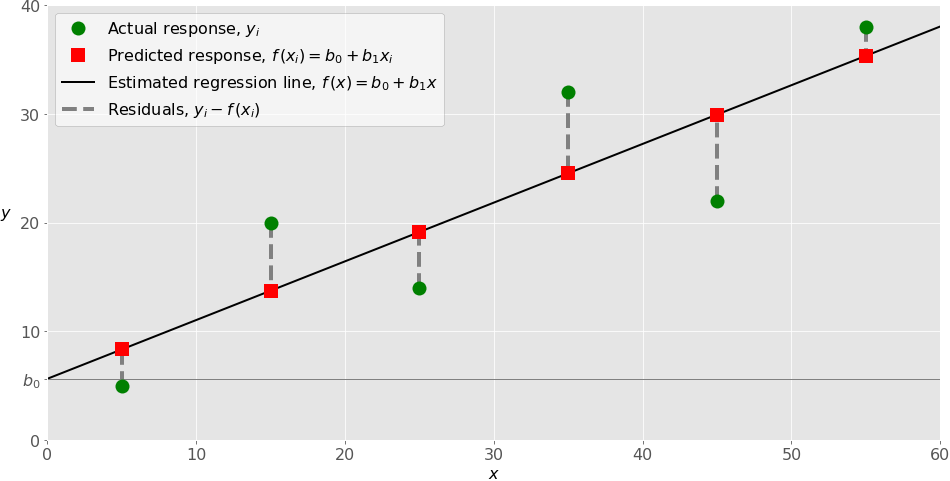

**Nota:** No confudir con el algoritmo de clasificación conocido como regresión logística, a pesar de que contiene la palabra "regresión" en su nombre.

---

Regresando a la regresión lineal, realizamos la generación de arreglos para el entrenamiento y el valor a predecir:

In [45]:
#Caso: 1 atributo -> y = m*x + b
#x: engine-size
#y: price
x_tag = 'engine-size' # etiqueta independiente
y_tag = 'price' # etiqueta dependiente
x = dataset2[[x_tag]].values # genera arreglo de entrenamiento según tamaño del motor
y = dataset2[[y_tag]].values # genera arreglo de dato a predecir

Ajustamos el set de entramiento al modelo y realizamos predicciones sobre los datos:

In [46]:
from sklearn.linear_model import LinearRegression #biblioteca de machine learning en Python
rl1 = LinearRegression()  # crea un objeto del modelo de regresión lineal
rl1.fit(x, y)  # ejecuta la regresión lineal: relaciona de forma lineal los valores del tamaño del motor a su precio
y_pred = rl1.predict(x)  # el modelo genera predicciones a partir de los valores de tamaño de motor

Visualizamos los resultados del modelo de regresión lineal con su respectiva predicción:

Estimación del precio según el tamaño del motor: $29166.821267268697


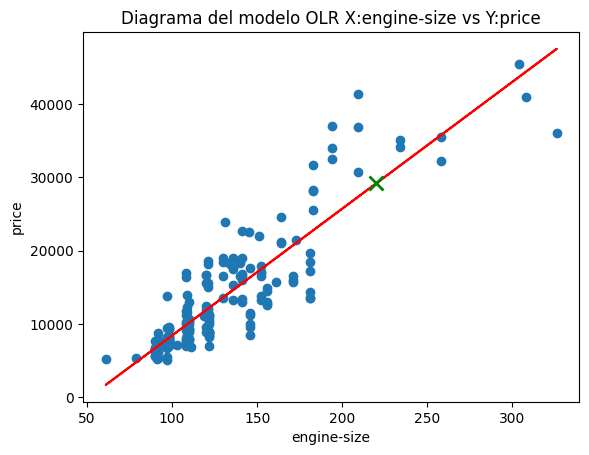

In [47]:
# Diagrama de dispersión y modelo de regresión lineal
plt.title('Diagrama del modelo OLR X:{} vs Y:{}'.format(x_tag, y_tag))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel(x_tag)
plt.ylabel(y_tag)

#Imprimir valor a predecir
eng_size = 220 # pulgadas cúbicas
test_value = np.array([[eng_size]])
pred = rl1.predict(test_value)
plt.plot(eng_size, pred, color='green', marker='x', markersize=10, mew=2)
print('Estimación del precio según el tamaño del motor: ${}'.format(pred[0][0]))

plt.show()

Se pueden obtener los parámetros del modelo de regresión lineal $(y = mx + b)$ y así realizar las estimaciones:

In [48]:
#Parámetros de la linea (y = mx + b)
m = rl1.coef_[0][0]
b = rl1.intercept_[0]
print('Parámetro de la regresión lineal ordinaria para un atributo:', m, b)
#Estimación del precio del vehículo según el tamaño del motor
price = m*eng_size + b
print('Precio del vehículo cuyo motor sea de 220 pulgadas cúbicas: ${}'.format(price))

Parámetro de la regresión lineal ordinaria para un atributo: 172.86186017273056 -8862.787970732028
Precio del vehículo cuyo motor sea de 220 pulgadas cúbicas: $29166.821267268697


### Coeficiente de determinación

El desempeño de un modelo de regresión puede medirse usando el **coeficiente de determinación**, denotado como $R^2$, el cual mide la variación en la variable de respuesta que puede ser explicada por la dependencia respecto a los predictores según el modelo de regresión.

In [49]:
#Medición del desempeño de la regresión

#R2 usando RL y el tamaño del motor
rScore1 = rl1.score(x, y)
print('Coeficiente de determinación:', rScore1)

Coeficiente de determinación: 0.7899272137265414


De esta forma, entre más grande sea $R^2$ mejor es el ajuste del modelo a los datos, por lo tanto mejor es la capacidad del modelo de explicar la variación de la salida en función de los predictores. El rango de valores de $R^2$ va de cero a uno. Matemáticamente, $R^2$ se define como:

$R^2=1-\frac{{SSR}_\text{Reg}}{{SSR}_\text{Total}}=1-\frac{\sum_{i}{(y_i-\hat{y}_i)^2}}{\sum_{i}{(y_i-\bar{y})^2}}$

donde $y_i$ es el i-ésimo valor de la variable de respuesta $y$, $\hat{y}_i$ es su valor estimado según el modelo de regresión y  $\bar{y}$ es el valor promedio de $y$.

### Regresión lineal multivariada

Como es evidente, el desempeño del modelo de regresión lineal no es tan cercano a 1 como se hubiera esperado, por lo que podemos aplicar las estrategias ya conocidas para solventar este subajuste, como aumentar la cantidad de atributos:

In [50]:
#Crear el objeto de regresión lineal
rl2 = LinearRegression()
x2 = dataset2[['engine-size', 'curb-weight']].values #dos descriptores

#Ajustamos el modelo de regresión lineal a los precios con respecto a los features
rl2.fit(x2, y)

#R2 usando RL y dos variables
rScore2 = rl2.score(x2, y)
print('Coeficiente de determinación para la regresión lineal bivariada:', rScore2)

Coeficiente de determinación para la regresión lineal bivariada: 0.8103051024971152


Desplegramos el gráfico de dispersión para el regresor lineal multivariado:

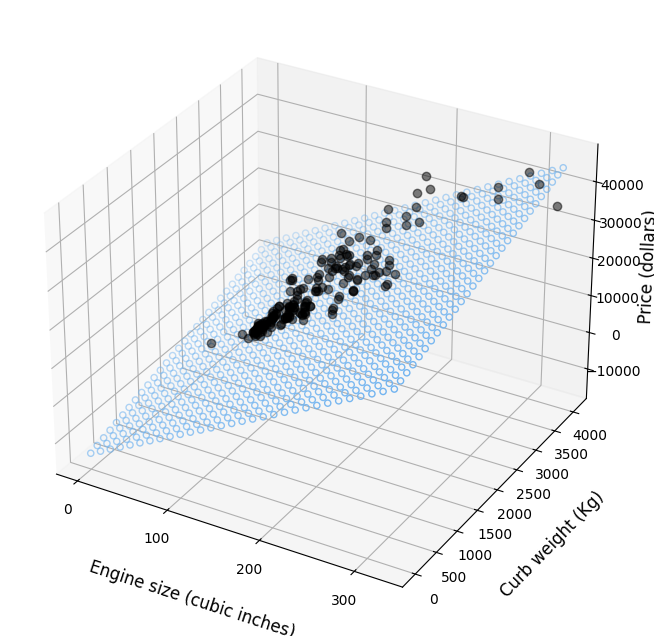

In [59]:
#Grafico de regresión lineal en 3d usando set de carros
x9 = x2[:, 0] #engine-size
y9 = x2[:, 1] #curb-size
z9 = y

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x_pred = np.linspace(0, np.max(x9), 30)
y_pred = np.linspace(0, np.max(y9), 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
newpred = rl2.predict(model_viz)

ax.plot(x9, y9, z9.flatten(), color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), newpred.flatten(), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Engine size (cubic inches)', fontsize=12, labelpad=15)
ax.set_ylabel('Curb weight (Kg)', fontsize=12, labelpad=15)
ax.set_zlabel('Price (dollars)', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

Obtenemos la evaluación del modelo de regresión:

In [52]:
#R2 usando RL y tres variables numéricas
x3 = dataset2[['engine-size', 'curb-weight', 'horsepower']].values
rl3 = LinearRegression()  # create a linear regression model (object)
rl3.fit(x3,y)  # perform linear regression
rScore3 = rl3.score(x3, y)
print('Coeficiente de determinación para la regresión lineal multivariada:', rScore3)

Coeficiente de determinación para la regresión lineal multivariada: 0.8194956061511466


Inspecionemos un momento el tipo de variables que contiene el set de datos de vehículos:

In [53]:
dataset2.info() #Imprimir información más detallada sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

Por el momento, hemos trabajado nuestros ejemplos con variables numéricas, pero nótese que este set de datos no solo maneja este tipo de variables. Podemos aumentar la dimensionalidad de igual forma incluyendo **variables independientes categóricas** a nuestro conjunto de entrenamiento:

In [54]:
#Ejemplo usando una variable categórica
x_cat = pd.get_dummies(dataset2[['num-of-cylinders']]) #Convierte una variable categórica en una variable indicadora

#Concatenar variables categóricas y numéricas
x_num = dataset2[['engine-size', 'curb-weight', 'horsepower']]
x4 = pd.concat([x_cat.reset_index(drop=True), x_num], axis=1) #concatenacion por columnas
x4 = x4.values

#Ajuste del modelo de regresión
rl4 = LinearRegression()  # create a linear regression model (object)
rl4.fit(x4, y)  # perform linear regression

#Valor R2
rScore4 = rl4.score(x4, y)
print('Coeficiente de determinación para la regresión lineal multivariada:', rScore4)

Coeficiente de determinación para la regresión lineal multivariada: 0.8473956617892355


### Regresión polinomial

Por otra parte, podemos aumentar complejidad del modelo mediante el uso de una función polinomial en lugar de una lineal, para minimizar el MSE entre los datos de entrenamiento y los datos a predecir:

Coeficiente de determinación para la regresión polinomial univariada: 0.8091757219980812
Estimación del precio según el tamaño del motor: $32828.03664130874


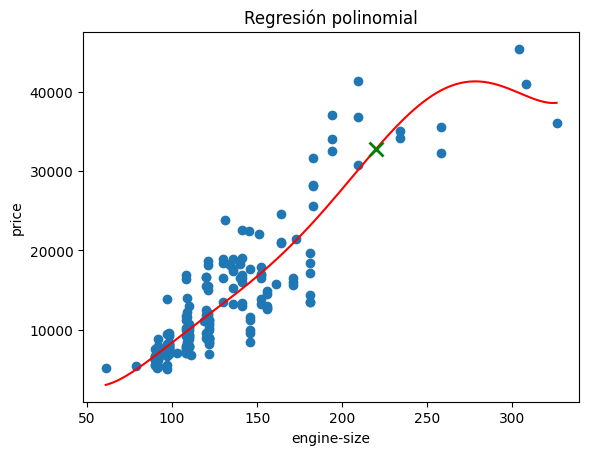

In [55]:
#Regresión polinomial univariada
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
degree = 6
x_pol1 = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x)

#Ajuste de la regresión polinomial
rl_pol1 = LinearRegression().fit(x_pol1, y)

#Impresion en pantalla del modelo
plt.scatter(x, y)
x_seq = np.linspace(x.min(),x.max(),x.size).reshape(-1,1)
y_curve = rl_pol1.predict(PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_seq))
plt.plot(x_seq, y_curve, color='red')
plt.title('Regresión polinomial')
plt.xlabel(x_tag)
plt.ylabel(y_tag)

#Desempeño de la regresión polinomial
r2_pol1 = rl_pol1.score(x_pol1, y)
print('Coeficiente de determinación para la regresión polinomial univariada:', r2_pol1)

#Imprimir valor a predecir
eng_size = 220
test_value = np.array([[eng_size]])
test_pol = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(test_value)
pred_pol = rl_pol1.predict(test_pol)
plt.plot(test_value, pred_pol, color='green', marker='x', markersize=10, mew=2)
print('Estimación del precio según el tamaño del motor: ${}'.format(pred_pol[0][0]))

Por otro lado, tenemos la regresión polinomial bivariada con atributos numéricos:

In [ ]:
# Regresión polinomial bivariada

#Transformación de la entrada al grado del polinomio de interés
x_pol2 = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x2)

#Ajuste de la regresión polinomial multivariada
rl_pol2 = LinearRegression().fit(x_pol2, y)

#Desempeño de la regresión polinomial multivariada
r2_pol2 = rl_pol2.score(x_pol2, y)
print('Coeficiente de determinación para la regresión polinomial bivariada:', r2_pol2)

Igualmente, es posible implementar una regresión polinomial multivariada, tanto con variables numéricas y categóricas:

In [ ]:
# Regresión polinomial multivariada

#Transformación de la entrada al grado del polinomio de interés
x_pol4 = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x4)

#Ajuste de la regresión polinomial multivariada
rl_pol4 = LinearRegression().fit(x_pol4, y)

#Desempeño de la regresión polinomial multivariada
r2_pol4 = rl_pol4.score(x_pol4, y)
print('Coeficiente de determinación para la regresión polinomial multivariada:', r2_pol4)

### Regresión de los vecinos más cercanos

El dato objetivo es estimado mediante interpolación local de los valores reales asociados a los vecinos más cercanos en el set de entrenamiento. Vamos a efectuar el experimento de la complejidad del modelo y así determinar una cantidad de vecinos óptima:

In [ ]:
# kNN para regresión univariada
from sklearn.neighbors import KNeighborsRegressor

#entrenamiento de kNN
rScores = []

#Calcular el coeficiente de determinación usando entre 1 y 15 vecinos
for k in range(1,15):
  neighReg = KNeighborsRegressor(n_neighbors=k).fit(x, np.ravel(y))

  #para cada valor de vecinos se calcula la suma del cuadrado dentro del clúster
  rScore = neighReg.score(x, np.ravel(y))
  rScores.append(rScore)

#trazamos la curva de la complejidad del modelo
plt.figure(figsize=[10,6])
plt.title('Evaluación de k-vecinos para la regresión univariada')
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Coeficiente de terminación')
plt.plot(list(range(1,15)), rScores, marker="o")
plt.show()

Procedemos con el entrenamiento del regreso de los vecinos más cercanos con el parámetro optimizado:

In [ ]:
# cantidad de vecinos
n_neighbors = 4 #k optimo segun grafico

# ajuste del modelo de kNNs
nn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
nn_reg.fit(x, np.ravel(y))

#Puntaje kNN
rScore = nn_reg.score(x, y)
print('Coeficiente de determinación para el regresor de los vecinos más cercanos:', rScore)

#Imprimir valor a predecir
eng_size = 220
test_value = np.array([[eng_size]])
pred = nn_reg.predict(test_value)
print('Estimación del precio según el tamaño del motor: ${}'.format(pred[0]))

### Consideraciones sobre los modelos de regresión

1. Es importante destacar que en un problema de regresión las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es **continua**.
2. Los coeficientes de la regresión lineal se obtienen a través del método de mínimos cuadrados que minimiza **la suma de residuales cuadrados (SSR)**.
3. El $R^2$ es una de las principales métricas para medir el desempeño de una regresión, pues explica qué tanta variabilidad en la respuesta puede ser explicada por el modelo. Sin embargo, es importante resaltar que existen muchas métricas más para medir el desempeño de un modelo de regresión como el **error cuadrático medio (MSE)** y el  **error absoluto medio (MAE)**.
4. En todo set de datos estructurado, cada **variable independiente** representa una **dimensión** y un grupo de dimensiones constituye una observación como un vector de características. Los algoritmos de ML puede tener inconvenientes con distribuciones de datos que contengan múltiples dimensiones; es decir, modelos que sean multivariados, puesto que una gran cantidad de variables independientes implican una gran cantidad de datos de entrenamiento que requiere el modelo. Esta dificultad con espacios de alta dimensionalidad se conoce como **la maldición de la dimensionalidad**.
5. En el caso de experimentar sobreajuste, se puede aumentar la complejidad del modelo al utilizar regresión lineal LASSO y/o RIDGE cuya **regularización** está dada por la norma L1 y la norma L2, respectivamente.
6. La meta de un modelo de regresión puede ser la **predicción** de la respuesta a partir de un conjunto de variables de entrada o bien la **cuantificación** de la fuerza y tipo de relación entre la respuesta y las variables de entrada.

## Subajuste y sobre-ajuste


Por último y no menos importante, al momento de diseñar ya sea un modelo de clasificación y/o uno de regresión corresponde a los problemas de **subajuste o error de sesgo (*underfitting*)** y el **sobreajuste o error de varianza (*overfitting*)**.




El **subajuste** ocurre cuando un modelo no es capaz de capturar correctamente el patrón que siguen los datos de entrenamiento usualmente debido a su simplicidad o falta de entrenamiento.

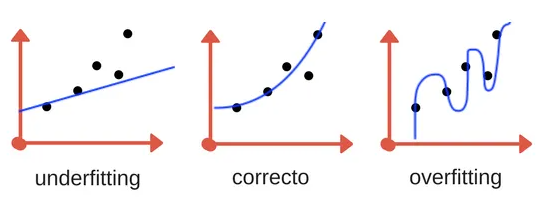

El **sobreajuste** ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento pero su desempeño es significativamente menor cuando se aplica a nuevos datos.

¿Cómo reducir el sobreajuste?

  1. Usar más datos de entrenamiento
  2. Aumentado de datos
  3. Validación cruzada
  4. Selección de variables
  5. Regularización

**QUIZ: APRENDIZAJE SUPERVISADO**

Si se tiene el siguiente modelo de regresión lineal para predecir $y$ en función de $x_1$:

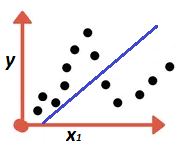

Cuál sería la forma más simple y económica de mejorar el desempeño del modelo:

- Recolectar datos sobre variables independientes adicionales ($x_2,x_3,...$) para incorporarlas al modelo
- Recolectar observaciones adicionales de $x_1$ y reentrenar el modelo
- Aumentar la complejidad del modelo de regresión
- La 2 y la 3


El problema que afronta el modelo anterior es un problema de:

- Sobreajuste
- Subajuste
- La 1 y la 2
- Ninguna de las anteriores

## Práctica 2

Usando el dataset *obesity.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:

1. Implemente un modelo de regresión que estime el **peso** de una persona a partir de su **altura** y **edad**. Luego, imprima en pantalla la métrica $R^2$ para medir el desempeño del modelo.

2. Aumente la complejidad del modelo de regresión y agregue variales independientes (númericas y/o categóricas) tanto como se requiera, con el fin de mejorar las métricas de evaluación. Despliegue en la sesión de trabajo los resultados respectivos.

3. Implemente un modelo de clasificación que estime el grado de obesidad de una persona (*NObeyesdad*) basado únicamente en atributos de su **hábitos de alimentación**. Luego, imprima en pantalla la exactitud del modelo y su matriz de confusión.

4. Implementre otro modelo de clasificación que estime el *NObeyesdad* de una persona basado únicamente en atributos relacionados con su **condición física**. Luego, imprima en pantalla la exactitud del modelo y su matriz de confusión.

5. **Opcional**: ¿Cual de los dos modelos logra predecir con mayor exactitud el grado de obesidad de una persona? ¿Cúal es la categoría de obesidad que presentó más falsos negativos para cada modelo? ¿Cúal es la categoría de obesidad que presentó más falsos positivos para cada modelo?

In [ ]:
# Puede realizar su práctica aquí